# Business Ties

Can we piece the business community/ economy of Eigg together from data online

In [30]:
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

Extended:

LIST OF NAMES HERE:

https://opengovuk.com/company/SC177386
Eric Weldon
Camille Dressler, Maighread Foxley, Karen Helliwell, Michael Foxely, Michael Hutchison and vintage Talisker

--LAIG FARM & BEACH BOTHY

George Carr 
Saira Renny

(Sheep farming)

IMPLY CONNECTION TO THE BNBs&Shops ???????????????????

Stuart Millar (Lives in Howlin House) https://www.express.co.uk/news/uk/173449/Wedding-brawl-ends-island-s-record-of-50-crime-free-years

FISHERMAN AGAIN IMPLIED CONNECTION????????????????

--EIGG School https://eiggprimary.files.wordpress.com/2019/12/eigg-handbook-final.pdf

Lucy Conway and Eddie Scott are CROFTERS ALSO
Libby Galli earns main income from "serving tea to tourists" => Cafe employee? https://www.pressreader.com/uk/the-scottish-mail-on-sunday/20190714/282029033803138 AND "Making cakes" for tourists => https://www.tripadvisor.co.uk/Hotel_Review-g1898488-d2176110-Reviews-or5-Glebe_Barn-Isle_of_Eigg_The_Hebrides_Scotland.html#REVIEWS

Sue and Alisdair Kirk (Kildonnan = Sister https://www.tripadvisor.co.uk/ShowUserReviews-g1898488-d1869961-r206617147-Lageorna-Isle_of_Eigg_The_Hebrides_Scotland.html (reply from owner))

--EIGG SHOP (&POST OFFICE)
https://www.bbc.co.uk/radio4/today/reports/archive/features/holidayhome.shtml
https://ec.europa.eu/regional_policy/en/projects/united-kingdom/eigg-goes-green

https://www.heraldscotland.com/life_style/14680447.the-islanders-who-took-control-and-transformed-beaten-eigg/

https://laigbaybrewingco.wordpress.com/ [LAIG BAY BREWING]

LINK DONNA (BAGPIPES) TO TOURISM?

https://suite.endole.co.uk/insight/company/SC177386-eigg-trading-limited

INCLUDE HERITAGE TRUST & CREATIVE EIGG??
http://isleofeigg.org/creative-eigg/

MAIRI MCKINNON HAS A CROFT https://www.theguardian.com/uk-news/2017/apr/22/eigg-hebrides-scotland-celebrates-hard-won-renewal

In [51]:
def uninferredNamesGraph():
    relationships = {}
    
    relationships["Damian Helliwell"] = ["Heritage Trust"]
    relationships["Margaret Fyffe"] = ["Clean Planet Now", "Heritage Trust", "Eigg Electric", "Eigg Trading", "Eigg Construction", "The Bothy Cuagach"]
    relationships["Norah Barnes"] = ["Clean Planet Now", "Heritage Trust", "Eigg Eco Centre"]
    relationships["Elizabeth Boden"] = ["Eigg Huts", "Heritage Trust", "Eigg Shed", "Eigg Primary School", "Sandavore Farm", "Eigg Trading"]
    relationships["Lucy Conway"] = ["Heritage Trust", "Lagerona", "Sweeney's Bothy", "Eddie's Eigg Croft", "Eigg Primary School"] #accountant, wife to eddie
    relationships["Sarah Boden"] = ["Eigg Huts", "Heritage Trust", "Eigg Electric", "Sandavore Farm", "Kildonnan Bay Oysters"]
    relationships["Mark Alan Foxwell"] = ["Heritage Trust"]
    relationships["Grey Carr"] = ["Heritage Trust"]
    relationships["Jacqueline Kirk"] = ["Heritage Trust", "Eigg Shop"]
    relationships["Ian Leaver"] = ["Heritage Trust"]
    relationships["Stuart McCarthy"] = ["Glebe Barn","Heritage Trust", "Laig Bay Brewing", "Galmisdale Cafe", "Lagerona", "Eigg Construction"] #supplies restaurants with beer 
    relationships["Tasha McVarish"] = ["Heritage Trust", "Eigg Primary School", "Equilibrium Eigg Massage Therapy"]
    
    relationships["Sue Hollands"] = ["Eigg Organics", "Eigg Electric"]
    relationships["Neil Robertson"] = ["Eigg Organics", "Roadworks"]
    
    relationships["Sue Kirk"] = ["Lagerona", "Kildonnan", "Eigg Shop", "Eigg Construction"] #Kildonnan as they send extra traffic there as is Sister
    relationships["Alisdair Kirk"] = ["Lagerona", "Eigg Construction"] ##INFERRED Roadworkds => Contruction co 
    
    relationships["Charlie Galli"] = ["Taxi Service"]
    relationships["Libby Galli"] = ["Eigg Crafts"]
    
    relationships["Eddie Scott"] = ["Sweeney's Bothy", "Eddie's Eigg Croft", "Eigg Electric"]
    
    relationships["Marie Carr"] = ["Kildonnan House"]
    relationships["Colin Carr"] = ["Kildonnan House", "Eigg Electric", "Eigg Construction"]
    relationships["Greg Carr"] = ["Kildonnan House", "Eigg Trading"]
    
    relationships["Alex Boden"] = ["Eigg Shed", "Sandavore Farm", "Eigg Huts", "Hebnet Cic"]
    
    relationships["Katrin Bach"] = ["Eiggy Bread", "Glebe Barn", "Eigg Primary School"] #caterer for Glebe barn
    
    relationships["Tamsin McCarthy"] = ["Glebe Barn", "Eigg Primary School", "Eigg Construction"]
    
    relationships["Simon Helliwell"] = ["Glebe Barn", "Hebnet Cic"] #previous owner of glebe, along with karen hellwell
    relationships["Karen Helliwell"] = ["Glebe Barn"] #daughter is now technically owner

    relationships["Louise Taylor"] = ["Eigg Primary School"]
    relationships["Martin Merrick"] = ["Eigg Primary School"]
    relationships["Kenneth Kean"] = ["Eigg Primary School"]
    relationships["Amanda Moult"] = ["Eigg Primary School"]
    relationships["Annabelle Scott-Moncrieff"] = ["Eigg Primary School"]
    relationships["Laraine Wyn-Jones"] = ["Eigg Adventures", "Eigg Camping Pods", "Eigg Trading"]
    relationships["Owain Wyn-Jones"] = ["Eigg Adventures", "Eigg Camping Pods"]
    
    #SAME GUY?!?!?!?!!?!?!
    relationships["John Christopher Lynch"] = ["LOST MAPS RECORDS LTD"]
    relationships["John Christopher Clare"] = ["Eigg Electric"]
    relationships["John Booth"] = ["Eigg Electric", "Eigg Construction"]
    
    relationships["George Carr"] = ["Laig Farm"] ##SHEEP FARMING
    relationships["Saira Renny"] = ["Laig Farm"]
    
    relationships["Bob Wallace"] = ["Eigg Eco Centre"]
    
    relationships["Stuart Millar"] = ["Fishing"]
    
    relationships["Jenny Robertson"] = ["A NEAD KNITWEAR", "Eigg Crafts"]
    
    relationships["Donna McCulloch"] = ["Refuse Collection", "Eigg Crafts"] #Technically "Creative Eigg"
    
    relationships["Celia Bull"] = ["Selkie Explorers"]
    
    ##basket making
    relationships["Catherine Davies"] = ["Eigg Crafts"]
    relationships["Pascal Carr"] = ["Eigg Crafts"]
    
    relationships["Stuart Fergusson"] = ["Eigg Trading", "Galmisdale Cafe"]
    
    relationships["Peter Wade-Martins"] = ["Tophouse"]
    relationships["Susanna Wade-Martins"] = ["Tophouse"]
    
    relationships["Jacky"] = ["TIGH AN SITHEAN"]
    relationships["Mick"] = ["TIGH AN SITHEAN"]
    
    relationships["Mairi McKinnon"] = ["Health & Home Care"]
    relationships["Clare Miller"] = ["Health & Home Care", "Eigg Yurts"]
    
    relationships["John"] = ["Craigard Teas"]
    relationships["Sheila"] = ["Craigard Teas"]

    relationships["Camille Dressler"] = ["Eigg Crafts", "Eigg History"]
    relationships["Hilda Ibrahim"] = ["Eigg Crafts"]
    
    relationships["Ian Alexander James Bolas"] = ["Hebnet Cic"]
    relationships["David Byres Newton"] = ["Hebnet Cic"]
    relationships["Marc Allan Smith"] = ["Hebnet Cic"]
    
    relationships["Jennifer Leiper"] = ["Clean Planet Now"]
    relationships["Robert Wallace"] = ["Clean Planet Now"]
    relationships["Rosemary Jane Acock"] = ["Clean Planet Now"]
    
    return relationships

def inferredNamesGraph():
    relationships = uninferredNamesGraph()
    
    

In [41]:
def buildNamedBusinessGraph(inferred=False):
    G = nx.Graph()
    
    data = uninferredNamesGraph()
    if inferred:
        data = inferredNamesGraph()
        
    names = data.keys()
    
    for k,i in enumerate(names): G.add_node(i)
        
    for name1 in names:
        for name2 in names:
            if name1 != name2 and len(list(set(data[name1]) & set(data[name2]))):
                G.add_edge(name1,name2)
    
    labels={}
    for k,i in enumerate(names): labels[i] = i
    return G, labels

def buildBusinessGraph(inferred=False):
    G = nx.Graph()
    data = uninferredNamesGraph()
    if inferred:
        data = inferredNamesGraph()
    
    names = data.keys()
    businesses = list(Counter([item for sublist in data.values() for item in sublist]).keys())
    
    businessMembers = defaultdict(list)
    for b in businesses:
        for name in names:
            if b in data[name]:
                businessMembers[b].append(name)
            
    businessList = businessMembers.keys()
    for k,i in enumerate(businessList): G.add_node(i)
    for b1 in businessList:
        for b2 in businessList:
            if b1 != b2 and len(list(set(businessMembers[b1]) & set(businessMembers[b2]))):
                G.add_edge(b1,b2)
    
    labels={}
    for k,i in enumerate(businessList): labels[i] = i
    return G, labels

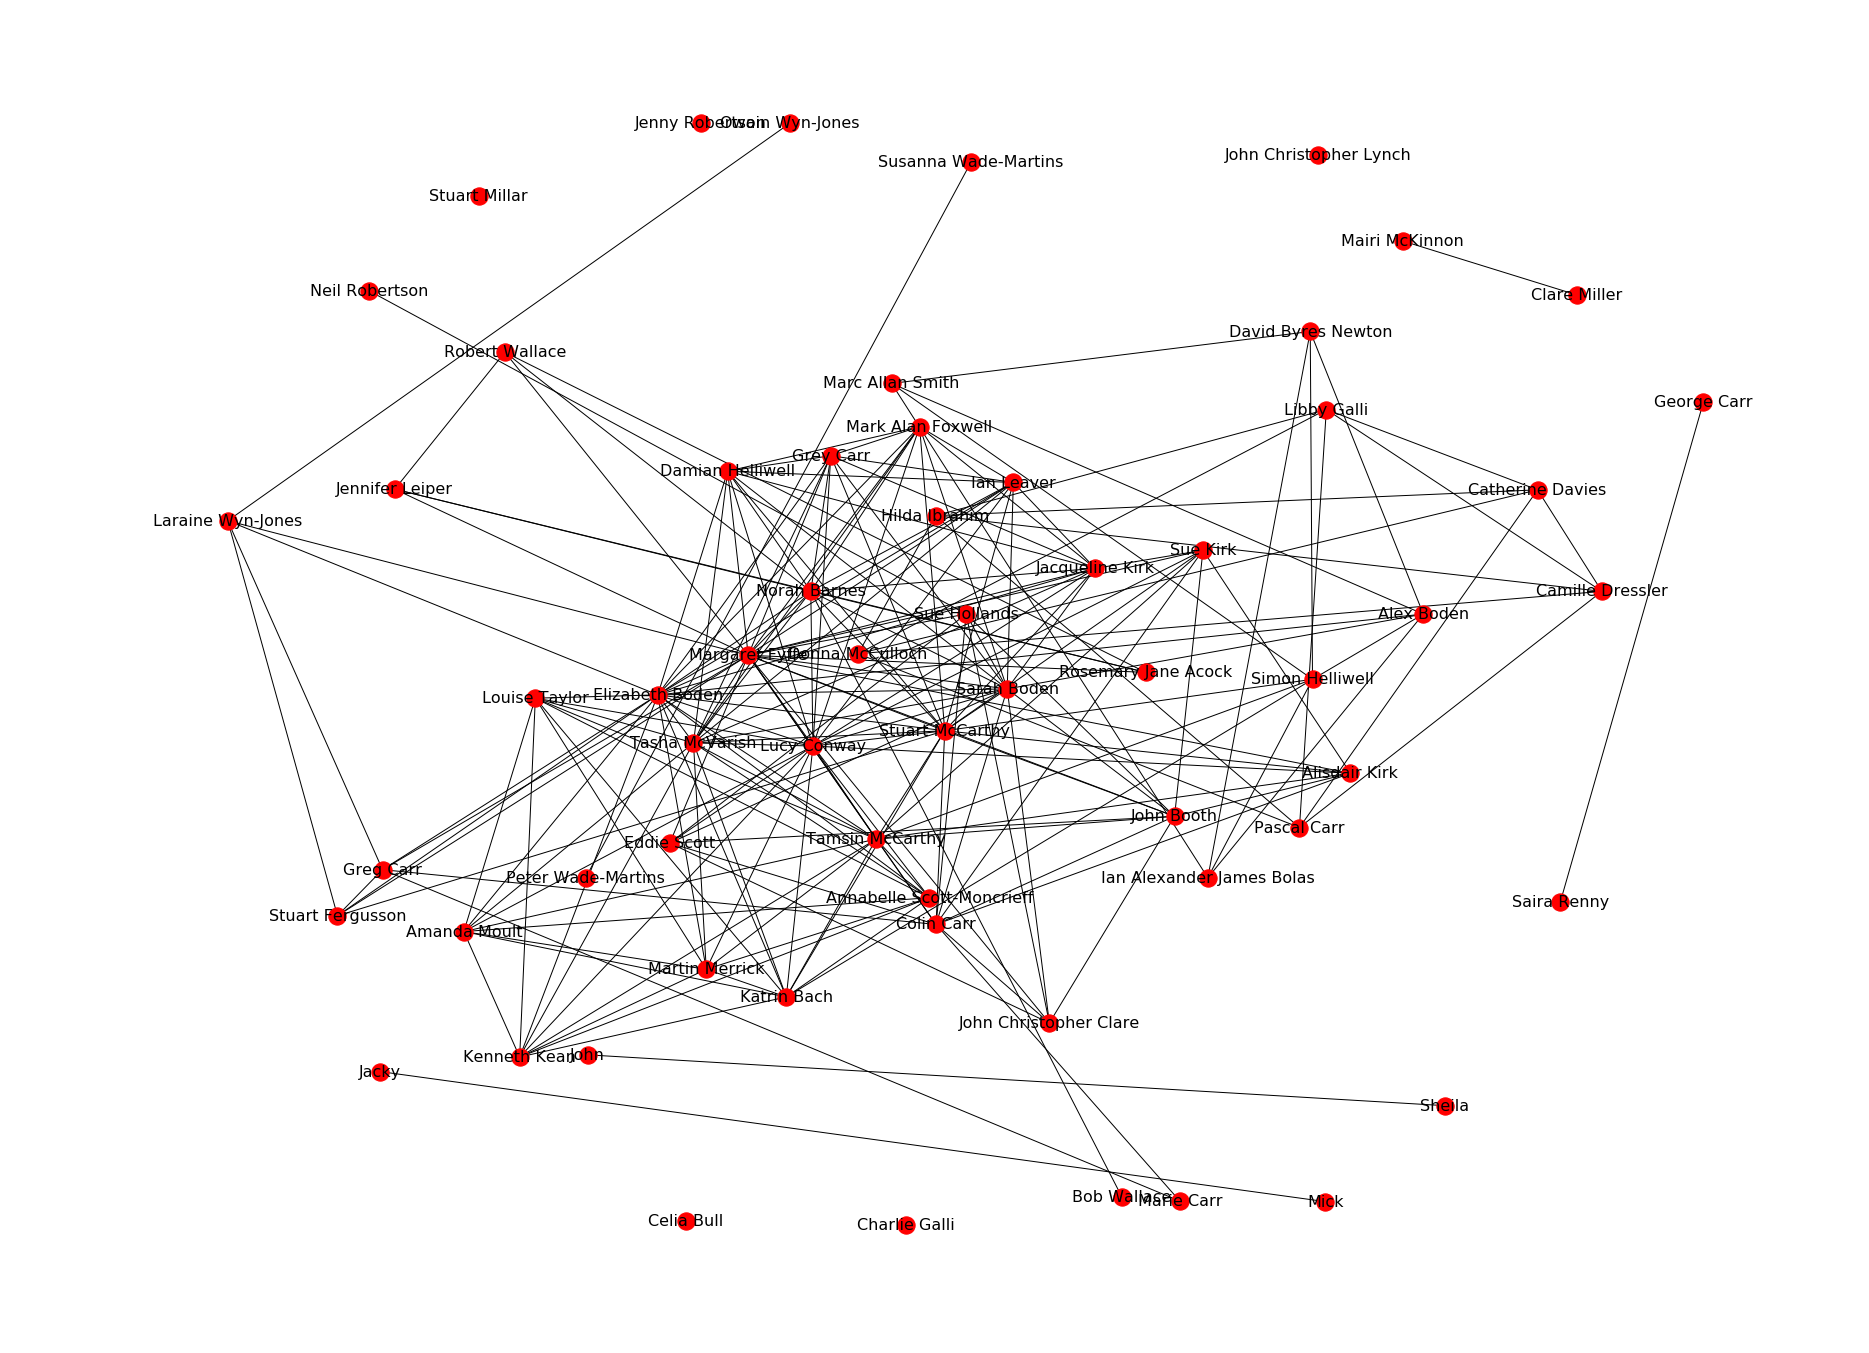

In [48]:
G, labels= buildNamedBusinessGraph()
pos=nx.spring_layout(G,k=1)
nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos)

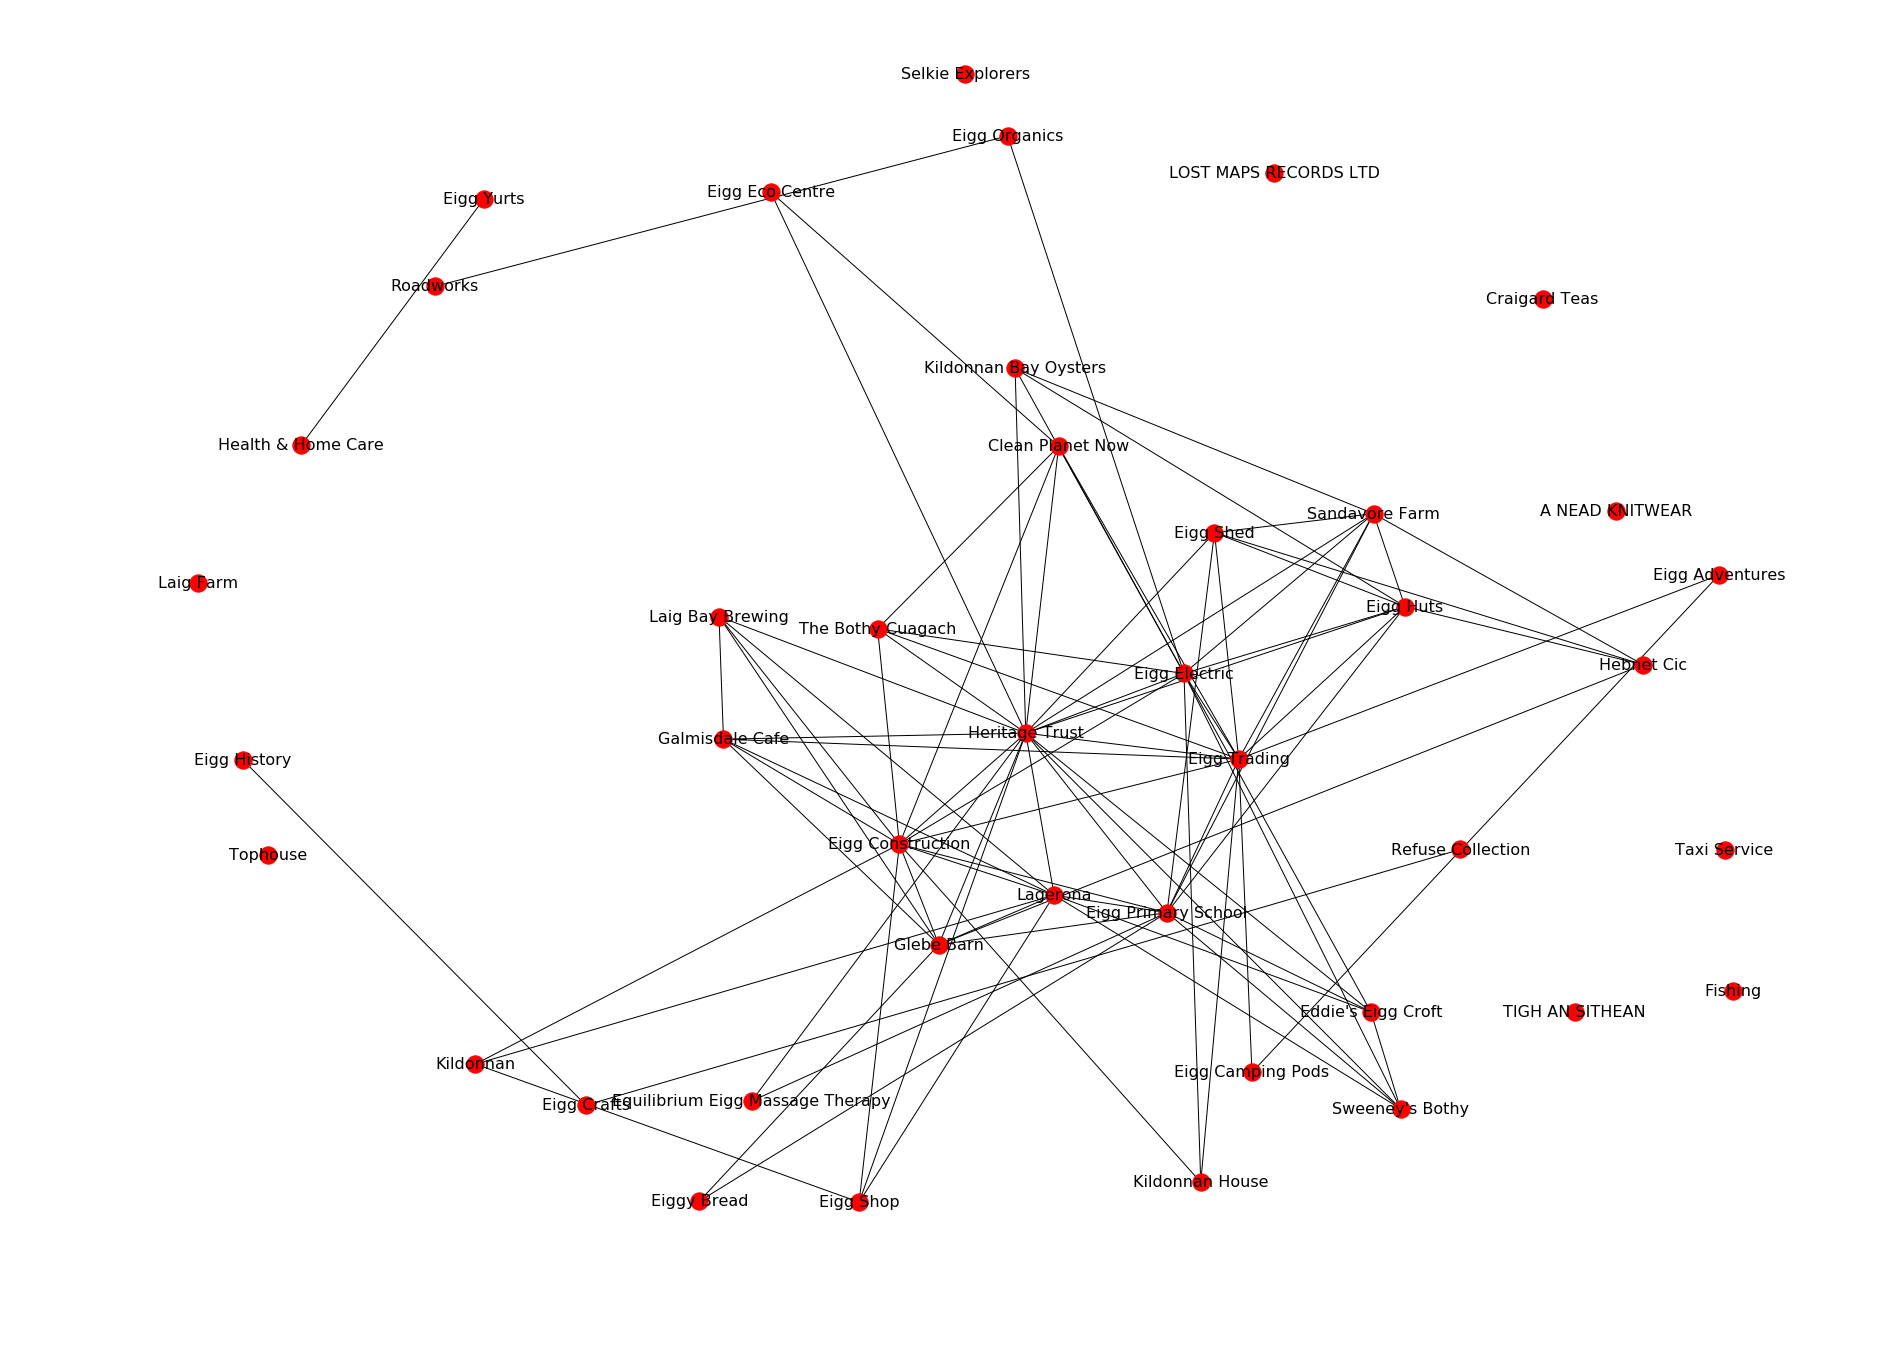

In [45]:
G, labels= buildBusinessGraph()
pos=nx.spring_layout(G,k=1)
nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos)

In [ ]:
G, labels= buildNamedBusinessGraph()
pos=nx.spring_layout(G,k=1)
nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos)

In [ ]:
G, labels= buildBusinessGraph()
pos=nx.spring_layout(G,k=1)
nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos)

#save the location details to a json file for visualising